In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_spss('1ResearchProjectData.sav')

In [3]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Student   216 non-null    float64 
 1   Teacher   216 non-null    category
 2   Gender    216 non-null    category
 3   Ethnic    216 non-null    category
 4   Freeredu  216 non-null    category
 5   Score     216 non-null    float64 
 6   wesson    217 non-null    category
dtypes: category(5), float64(2)
memory usage: 5.3 KB


(217, 7)

In [6]:
df.isnull().sum()



Student     1
Teacher     1
Gender      1
Ethnic      1
Freeredu    1
Score       1
wesson      0
dtype: int64

In [8]:
df.isnull()
# podemos apreciar que es solamente el alumno 216 el que carece de datos

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
212,False,False,False,False,False,False,False
213,False,False,False,False,False,False,False
214,False,False,False,False,False,False,False
215,False,False,False,False,False,False,False


# Data cleaning

In [11]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()
#Se han eliminado los datos del alumno 216


Student     0
Teacher     0
Gender      0
Ethnic      0
Freeredu    0
Score       0
wesson      0
dtype: int64

In [16]:
# Agregamos la columna method
# Si se trata del profesor ruger, el metodo sera "Standard" de otra forma, el metodo sera "tradicional"
df['Method'] = df['wesson'].apply(lambda x: 'Standard' if 'Ruger_Smith' in x else 'Traditional')


In [17]:
df.head()

,Student,Teacher,Gender,Ethnic,Freeredu,Score,wesson,Method
0,1.0,Ruger,Female,Asian,Free lunch,76.0,Ruger_Smith,Standard
1,2.0,Ruger,Female,Hispanic,Paid lunch,56.0,Ruger_Smith,Standard
2,3.0,Ruger,Female,African-American,Free lunch,34.0,Ruger_Smith,Standard
3,4.0,Ruger,Female,Asian,Paid lunch,59.0,Ruger_Smith,Standard
4,5.0,Ruger,Male,Hispanic,Free lunch,73.0,Ruger_Smith,Standard


In [18]:
# Vemos cuandos alumnos se encuentran estudiando bajo cada metodo 
df.Method.value_counts()

Standard       140
Traditional     76
Name: Method, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

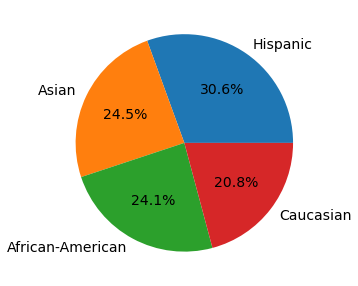

In [28]:
# Data analysis
plt.figure(figsize=(10,5))
plt.pie(df.Ethnic.value_counts().values, labels = df.Ethnic.value_counts().index, autopct = '%2.1f%%', textprops={'fontsize': 14})
plt.show

#Podemos apreciar que la mayoria de los estudiantes son hispanos, seguidos por estudiantes asiaticos, luego estudiantes afro-americanos y por ultimo estudiantes caucasicos

In [ ]:
# Analizamos la demografia de cada etnia

In [34]:
grouped_eg = pd.pivot_table(df, index = 'Ethnic', columns = 'Gender', aggfunc = 'count', values = 'Score')

<Figure size 1440x1440 with 0 Axes>

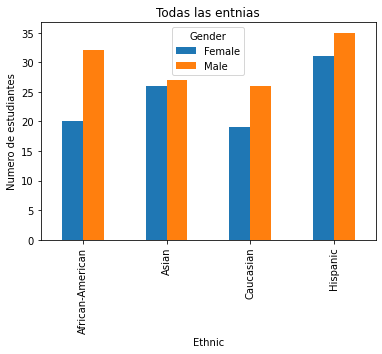

In [75]:
plt.figure(figsize = (20,20),)
grouped_eg.plot(kind = 'bar')
plt.title('Todas las entnias')
plt.ylabel('Numero de estudiantes')
plt.show()

In [37]:
grouped_eg
# Para cada grupo hay mas hombres que mujeres

Gender,Female,Male
Ethnic,,
African-American,20,32
Asian,26,27
Caucasian,19,26
Hispanic,31,35


In [40]:
# Puntuacion media

<AxesSubplot:xlabel='Method', ylabel='Score'>

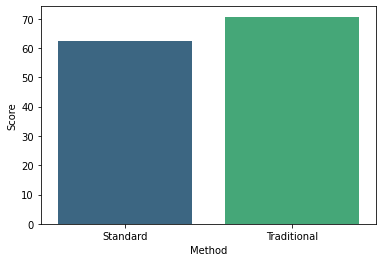

In [73]:
sns.barplot(x='Method', y ="Score", data = df, ci=None, palette = 'viridis')

#Podemos apreciar que con metodo tradicional los alumnos obtienen una puntuacion mas alta 

<AxesSubplot:xlabel='Ethnic', ylabel='Score'>

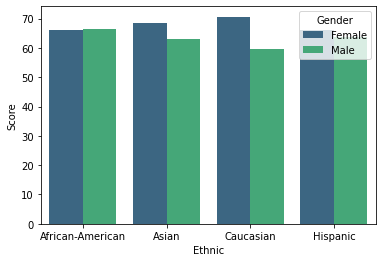

In [58]:
# Puntaje promedio
sns.barplot(x = 'Ethnic', y = 'Score', hue = 'Gender', data = df, ci = None, palette = 'viridis')

In [60]:
np.round(pd.pivot_table(df, index = 'Gender', columns = 'Ethnic', values = 'Score'), 2)

# En caso de los estudiantes asiaticos,caucasicos e hipanos las chicas se desempenan mejor que los hombres
# En cambio,en caso de los estudiantes afro-americanos los estudiantes hombres se desempenan mejor que las mujeres 

Ethnic,African-American,Asian,Caucasian,Hispanic
Gender,,,,
Female,66.05,68.38,70.63,66.26
Male,66.34,63.11,59.73,63.54


In [61]:
df_trad = df[df.Method == 'Traditional']
df_stan = df[df.Method == 'Standard']

# Metodo tradicional

Text(0.5, 1.0, 'average math score using traditional method')

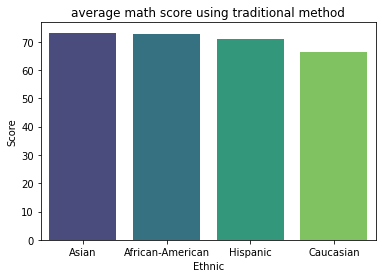

In [64]:
sns.barplot(data = df_trad, x='Ethnic', y='Score', ci=None, order = ['Asian', 'African-American', 'Hispanic', 'Caucasian'], palette = 'viridis')
plt.title('average math score using traditional method')

# La mayoria de los estudiantes obtuvieron una puntuacion arriba del 70 a excepcion de los caucasicos 

# Metodo standard

Text(0.5, 1.0, 'average math score using standard method')

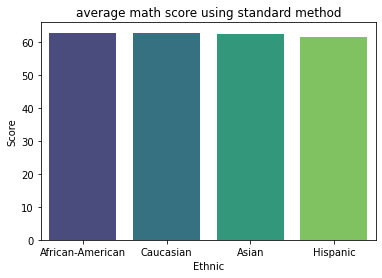

In [67]:
sns.barplot(data = df_stan, x='Ethnic', y='Score', ci=None, order = ['African-American','Caucasian','Asian','Hispanic'], palette = 'viridis')
plt.title('average math score using standard method')

# En esta caso, las puntuaciones estan mas balanceadas por encima del 60%, pero muy por debajo de las puntuaciones con el medoto tradicional


In [68]:
# Puntucacion media de cada profesor

<AxesSubplot:xlabel='Teacher', ylabel='Score'>

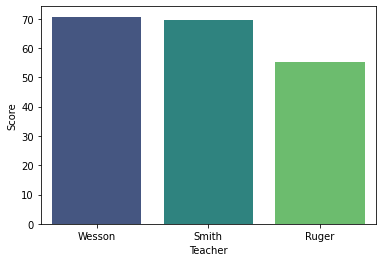

In [70]:
sns.barplot(x='Teacher', y = 'Score', data = df, ci = None, order = ['Wesson', 'Smith', 'Ruger'], palette = 'viridis')

# Podemos apreciar que el el metodo de Wesson el que produce la media de calificaciones mas alta

# Puntaje promedio en cada etnia por cada docente

In [71]:
pd.pivot_table(index = 'Teacher', columns = 'Ethnic', values = 'Score', data = df)

Ethnic,African-American,Asian,Caucasian,Hispanic
Teacher,,,,
Ruger,55.222222,53.705882,56.909091,55.640000
Smith,71.125000,69.900000,67.266667,69.888889
Wesson,72.888889,73.187500,66.315789,70.826087


Text(0.5, 1.0, 'Students performance compared to each teacher')

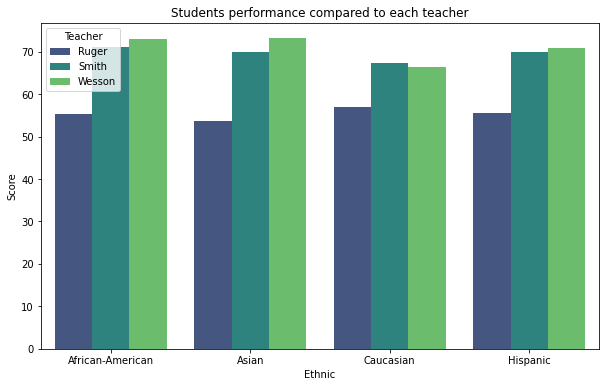

In [72]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = 'Ethnic', y = 'Score', hue = 'Teacher', ci = None, palette = 'viridis')
plt.title('Students performance compared to each teacher')